Keras Example of a 3 layer MLP to recognize MNIST Digits

This network has 2 full connected layers with 784 units organised to process a 28 x 28 pixel grayscale imagette with RELU activation
followed by a 10 unit layer with Softmax.

Train with 70% of MNIST data, validate with 30%

Save the history and plot the evoluation of Accuracy and loss over several epochs

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 240us/step - loss: 0.2227 - accuracy: 0.9326 - val_loss: 0.1049 - val_accuracy: 0.9682
Epoch 2/5
48000/48000 [==============================] - 12s 240us/step - loss: 0.0806 - accuracy: 0.9749 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 3/5
48000/48000 [==============================] - 11s 238us/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0920 - val_accuracy: 0.9736
Epoch 4/5
48000/48000 [==============================] - 12s 245us/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 5/5
10000/10000 [==============================] - 1s 97us/step
test_acc: 0.9783999919891357 test_loss 0.07401269227124285
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


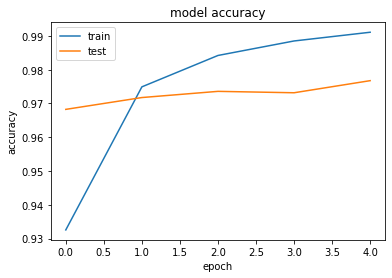

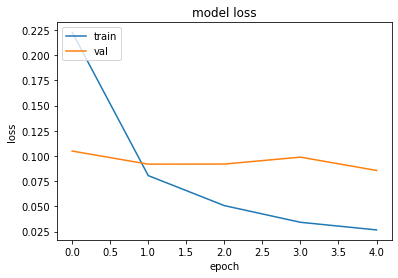

In [17]:
#import environmental variables. 

import tensorflow as tf
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential

import matplotlib.pyplot as plt
import math
from keras.layers import Dense
import tensorflow.keras.backend as K
from keras.utils import to_categorical

import os
import keras
from keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np
# from scikitplot.metrics import plot_confusion_matrix, plot_roc

# for history 
from glob import glob

# Load the MNIST Digits
# Keras provide a command to directly load the MNIST digits

(trainingSet, trainingLabel), (testSet, testLabel) = mnist.load_data()

# Define a 3 layer MLP
# Flattent the 28x28 MNIST digits to a 784 coefficient vector. 
# add 2 dense layers with 784 units and relu activation, 
# followed by an output layer with 10 units and softmax. 

model = Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# show the model

model.summary()

# Compile with Adam optimizer and categorical Cross entropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

trainingSet = trainingSet.reshape((60000, 28 * 28))
trainingSet = trainingSet.astype('float32') / 255
testSet = testSet.reshape((10000, 28 * 28))
testSet = testSet.astype('float32') / 255

# Train the model and save teh history
trainingLabel = to_categorical(trainingLabel)
testLabel = to_categorical(testLabel)
history=model.fit(trainingSet, trainingLabel, validation_split=0.30, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(testSet, testLabel)
print('test_acc:', test_acc, 'test_loss', test_loss)

# try to print history
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
# Simple mnist Convolutional network for recognizing MNIST digits

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import math



# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# split the data to obtain train and test sets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# data preparation
# Scale images to the [0, 1] range

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

#Train the model

batch_size = 128
epochs = 4
#epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_______________________________________________

KeyError: 'accuracy'

In [6]:
import matplotlib.pyplot as plt
import math
from glob import glob

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

SyntaxError: invalid syntax (<ipython-input-7-18fbadec14db>, line 4)